In [1]:
import pandas as pd

papers = pd.read_csv('./data_face/data_group_ner.csv')
# convert type of column
papers.rename(columns={'doc_ner': 'paper_text'}, inplace=True)
papers['paper_text'].astype(str)
# Print head
# print(papers.head())
# print(papers.shape)
print(papers['paper_text'][0])
print(papers['location'][0])
print(papers['person'][0])
print(papers['organization'][0])

nan
[]
[]
[]


In [2]:
papers.head()

,post_id,text,timestamp,time,user_id,location,person,organization,paper_text
0,640719428178910,🔥CÁC KÊNH YOUTUBE HỌC CÁC MÔN🔥\nVào từng ảnh đ...,1.696861e+09,2023-10-09 21:10:58,100042024003239,[],[],[],NaN
1,659246332992886,ae malibu thua nnn chưa ạ,1.699863e+09,2023-11-13 15:06:26,284734091022087,[],[],[],NaN
2,659210466329806,đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...,1.699857e+09,2023-11-13 13:26:16,306021115550368,[' ##lib'],[],[],đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...
3,659176019666584,"kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶",1.699850e+09,2023-11-13 11:41:09,1482440865923204,['ma ##lib ##u'],[],[],"kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶"
4,659172869666899,Long bào đã kịp về để Tết này còn flex với họ ...,1.699850e+09,2023-11-13 11:31:56,100037648460053,[],[],[],NaN


In [3]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())
papers.reset_index(inplace=True, drop=True)

0
            post_id                                               text  \
2   659210466329806  đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...   
3   659176019666584      kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶   
6   659173506333502   Khong có em cũng khong sao🔥\n#Malibu ngày đông 🥶   
11  655862303331289  Có ai mê mùi nước giặt ở Thiên Thai như em khu...   
15  659151593002360                                 V ơi tớ lạnh quá 🥶   

       timestamp                 time           user_id          location  \
2   1.699857e+09  2023-11-13 13:26:16   306021115550368        [' ##lib']   
3   1.699850e+09  2023-11-13 11:41:09  1482440865923204  ['ma ##lib ##u']   
6   1.699850e+09  2023-11-13 11:34:04  1009833816917610        ['Malibu']   
11  1.699290e+09  2023-11-06 23:52:19   897989658423274    ['Thiên Thai']   
15  1.699846e+09  2023-11-13 10:27:56  3751041085124649                []   

   person organization                                         paper_text  
2      []     

In [4]:
# get timestamps
timestamps = papers.time.to_list()

In [5]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# replace \n
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: re.sub('\n', ' ', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'][0]

'đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm mồm vào tắt âm đê ko ngủ để ngkhac ngủ lớn rồi ý thức lên'

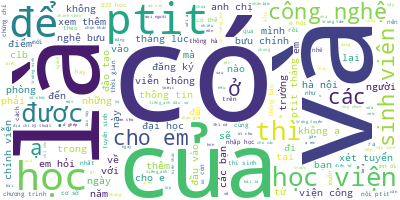

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
from underthesea import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # punctuation = punctuation.replace("-", "")
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    text = text.replace("_  _", "_")
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    # return ViTokenizer.tokenize(text)
    return word_tokenize(text, format="text")

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         # loại bỏ dấu câu and split
#         yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(str(sentence))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

def remove_emoj(text):
    emoj = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                                    "]+", re.UNICODE)
    return re.sub(emoj, '', text)

data = papers['paper_text_processed']
data = data.apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_emoj(x))
data = data.apply(lambda x: remove_number(x))
# data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
text = data[0]
print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


đ t cụ mấy thằng ptit malibu đi ngủ ngậm_mồm tắt_âm đê ko ngủ ngkhac ngủ ý_thức


### Training model with bertopic
#### Parameters
##### BERTopic

- language: Ngôn ngữ, ở đây là vietnamese
- top_n_words: số lượng từ được sử dụng để mô tả mỗi chủ đề
- n_gram_range: số lượng từ trong một n-gram
- min_topic_size: số lượng tài liệu tối thiểu trong mỗi chủ đề
- nr_topics: số lượng topic cần phát hiện. Nếu không được chỉ định, BERTopic sẽ tìm kiếm tất cả các chủ đề có thể có. Nếu Bertopic tìm thấy 100 chủ đề mà nr_topics=10 thì nó sẽ cố gắng đưa về 10 chủ đề.
- low_memory: sử dụng low memory mode để sử dụng ít bộ nhớ hơn
- calculate_probabilities: tính xác suất của từng từ trong topic
##### UMAP: 
UMAP là một kỹ thuật tuyệt vời để giảm kích thước. Trong BERTopic, nó được sử dụng để giảm tính chiều của việc nhúng tài liệu vào thứ gì đó dễ sử dụng hơn với HDBSCAN để tạo các cụm tốt. Tuy nhiên, nó có một số lượng đáng kể các tham số mà bạn có thể tính đến. Vì việc hiển thị tất cả các tham số trong BERTopic sẽ khó quản lý nên chúng ta có thể khởi tạo mô hình UMAP của mình và chuyển nó sang BERTopic:
```md
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(umap_model=umap_model).fit(docs)
```
- n_neighbors: 
- n_components: số chiều của embedding vector sau khi giảm chiều bằng UMAP
- metric: độ đo khoảng cách giữa các điểm dữ liệu trong không gian vector embedding (có thể là cosine, euclidean, manhattan, chebyshev, minkowski, canberra, braycurtis, mahalanobis, wminkowski, seuclidean, cosine, correlation, haversine, hamming, jaccard, dice, russellrao, kulsinski, rogerstanimoto, sokalmichener, sokalsneath, yule, or matching)
- low_memory: low_memory được sử dụng khi tập dữ liệu có thể tiêu tốn nhiều bộ nhớ. Việc sử dụng hàng triệu tài liệu có thể dẫn đến các vấn đề về bộ nhớ và việc đặt giá trị này thành True có thể giảm bớt tiêu hao bộ nhớ.

##### HDBSCAN
Sau khi giảm số chiều của embedding vector, Chúng tôi sử dụng HDBSCAN để phân cụm các tập docs thành các cụm tài liệu tương tự nhau. Tương tự như UMAP, HDBSCAN có nhiều tham số để tuỳ chỉnh:
```md
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model).fit(docs)
```
- min_cluster_size: số lượng tài liệu tối thiểu trong mỗi cụm
- min_samples: số lượng tài liệu tối thiểu trong mỗi cụm
- metric: được sử dụng để tính khoảng cách. Ở đây, chúng tôi đã sử dụng euclide vì sau khi giảm kích thước, chúng tôi có dữ liệu có chiều nhỏ và không cần tối ưu hóa nhiều. Tuy nhiên, nếu tăng n_comComponents trong UMAP thì nên xem xét các số liệu hoạt động với dữ liệu nhiều chiều.
- prediction_data: nếu True thì sẽ trả về các điểm dữ liệu được dự đoán cho mỗi cụm. Điều này có thể được sử dụng để phân tích các cụm và xác định các điểm nhiễu.


In [8]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.vectorizers import OnlineCountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# Step 2 - Reduce dimensionality
# umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
umap_model = IncrementalPCA(n_components=5)
# Step 3 - Cluster reduced embeddings
# hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model = MiniBatchKMeans(n_clusters=10, random_state=0)
# Step 4 - Tokenize topics
stop_words = list(stop_words)
vectorizer_model = OnlineCountVectorizer(stop_words=stop_words)
# vectorizer_model = CountVectorizer(stop_words=stop_words)
# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

nr_topics = 10
top_n_words = 10
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic represenations
  language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics, top_n_words=top_n_words
)
topic_model = topic_model.partial_fit(docs)

/home/minhthuy/anaconda3/envs/bertopic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 31/31 [00:04<00:00,  7.40it/s]
2023-11-14 11:53:47,608 - BERTopic - Reduced dimensionality
2023-11-14 11:53:47,722 - BERTopic - Clustered reduced embeddings


In [9]:
documents = topic_model.get_document_info(data)
documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
updated_topics = documents_per_topic.first().Topic.astype(int)
documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
print(c_tf_idf)

# c_tf_idf = c_tf_idf.toarray()
# col=8267
# print(f'c_tf_idf of {col}: ',c_tf_idf[0][col])
# df = pd.DataFrame(c_tf_idf, columns=words,dtype='float64')
# print('------------------')
# key = 'văn_hóa'
# print(f'c_tf_idf of {key}:')
# print(df[key])
# # sort
# t = 9
# df = df[df.iloc[t].sort_values(ascending=False).index]

# print(df.iloc[t][0:10])
# print(df.iloc[t][0:10].index)
# print(topic_model.get_topic(t))
# _extract_words_per_topic

  (0, 3758)	0.0035955554382899766
  (0, 3757)	0.005707118717215523
  (0, 3756)	0.005707118717215523
  (0, 3755)	0.012251182065324676
  (0, 3743)	0.005707118717215523
  (0, 3734)	0.005707118717215523
  (0, 3731)	0.005707118717215523
  (0, 3725)	0.010330563566085879
  (0, 3699)	0.009247951035413758
  (0, 3679)	0.005608010858303772
  (0, 3677)	0.04712889106121244
  (0, 3676)	0.005165281783042939
  (0, 3665)	0.005707118717215523
  (0, 3657)	0.016497771233980402
  (0, 3651)	0.010636747659713435
  (0, 3650)	0.005707118717215523
  (0, 3649)	0.0048485478308251334
  (0, 3646)	0.008167454710216451
  (0, 3636)	0.005707118717215523
  (0, 3629)	0.005707118717215523
  (0, 3607)	0.09490625336013356
  (0, 3606)	0.03595555438289976
  (0, 3605)	0.005707118717215523
  (0, 3604)	0.01920659934721402
  (0, 3593)	0.005165281783042939
  :	:
  (9, 195)	0.008026482030821918
  (9, 193)	0.017101632431940097
  (9, 183)	0.008550816215970048
  (9, 181)	0.00944779497487233
  (9, 149)	0.01426251693246726
  (9, 138)	0.

In [10]:
# from bertopic.representation import BaseRepresentation
# documents = topic_model.get_document_info(data)
# documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
# updated_topics = documents_per_topic.first().Topic.astype(int)
# documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
# c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
# # print(c_tf_idf)

# topics = topic_model.topics_
# documents = pd.DataFrame({"Document": docs, "Topic": topics, "ID": range(len(docs)), "Image": range(len(docs))})
# # topic_representations = topic_model._extract_words_per_topic(words, documents, c_tf_idf, False)
# # topic_representations

# labels = sorted(list(documents.Topic.unique()))
# labels = [int(label) for label in labels]

# top_n_words = 9170
# indices = topic_model._top_n_idx_sparse(c_tf_idf, n=top_n_words)
# scores = topic_model._top_n_values_sparse(c_tf_idf, indices)
# sorted_indices = np.argsort(scores)
# indices = np.take_along_axis(indices, sorted_indices, axis=1)
# scores = np.take_along_axis(scores, sorted_indices, axis=1)
# topics = {label: [(words[word_index], score)
#                           if word_index is not None and score > 0
#                           else ("", 0.00001)
#                           for word_index, score in zip(indices[index][::-1], scores[index][::-1])
#                           ]
#                   for index, label in enumerate(labels)}
# # print(topics[0])
# if isinstance(topic_model.representation_model, list):
#     print(1)
#     for tuner in topic_model.representation_model:
#         topics = tuner.extract_topics(topic_model, documents, c_tf_idf, topics)
# elif isinstance(topic_model.representation_model, BaseRepresentation):
#     print(2)
#     topics = topic_model.representation_model.extract_topics(topic_model, documents, c_tf_idf, topics)
    
# elif isinstance(topic_model.representation_model, dict):
#     print(3)
#     if topic_model.representation_model.get("Main"):
#         topics = topic_model.representation_model["Main"].extract_topics(topic_model, documents, c_tf_idf, topics)

# topics = {label: values[:top_n_words] for label, values in topics.items()}
# print(topics[1])
# print(topics[5])

In [11]:
topics = topic_model.topic_representations_
print(topics[1])
print(topics[5])

[('tuyển_sinh', 0.44333684), ('đào_tạo', 0.37963045), ('xét_tuyển', 0.37954372), ('httpsdaotaoptiteduvn', 0.36118424), ('httpstuyensinhptiteduvn', 0.35411978), ('httpsfacebookcomptittuyensinh', 0.31837055), ('tuyển', 0.29866275), ('trúng_tuyển', 0.28104123), ('lập_trình', 0.27570626), ('avatar', 0.2748109)]
[('kiến_thức', 0.3951795), ('học', 0.3802018), ('khoa_học_tự_nhiên', 0.36325946), ('toán', 0.35225448), ('nhà_a', 0.30360204), ('khoa_học_xã_hội', 0.30263382), ('khoa', 0.28831482), ('đại_cương', 0.27753788), ('_toán', 0.27270195), ('cntt', 0.27089083)]


In [12]:

topic_model.visualize_documents(docs)

In [13]:
topic_model.visualize_topics()

Các chủ đề được tạo có thể được giảm bớt theo thứ bậc. Để hiểu cấu trúc phân cấp tiềm năng của các chủ đề, chúng ta có thể sử dụng scipy.cluster.hierarchy để tạo các cụm và trực quan hóa cách chúng liên quan với nhau. Điều này có thể giúp chọn nr_topics thích hợp khi giảm số lượng chủ đề bạn đã tạo. Để hình dung hệ thống phân cấp này, hãy chạy như sau:

In [14]:
topic_model.visualize_hierarchy()

In [15]:
topic_model.visualize_barchart()

In [16]:
topic_model.visualize_heatmap()

rank c-tf-idf của các từ theo thứ tự giảm dần

In [17]:
topic_model.visualize_term_rank() # => visualize_term_rank (rank, score)

In [28]:
classes = [i for i in papers["post_id"]]
classes = [str(i) for i in classes] # convert to string
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

0it [00:00, ?it/s]

968it [02:40,  6.02it/s]


In [19]:
print(timestamps)
import datetime
import re

timestamps1 = [time.split()[0] for time in timestamps]
print(timestamps1)
timestamp_ = [datetime.datetime.strptime(timestamp, "%Y-%m-%d").date() for timestamp in timestamps1]
print(timestamp_)
timestamp_ = [str(time.year)+'-'+str(time.month)+'-'+str(time.day) for time in timestamp_]
print(timestamp_)

['2023-11-13 13:26:16', '2023-11-13 11:41:09', '2023-11-13 11:34:04', '2023-11-06 23:52:19', '2023-11-13 10:27:56', '2023-11-12 18:54:04', '2023-11-12 18:17:09', '2023-11-12 08:56:17', '2023-11-11 22:10:54', '2023-11-09 20:21:09', '2023-11-10 22:46:47', '2023-11-11 21:11:58', '2023-11-11 13:03:53', '2023-11-11 16:17:19', '2023-11-11 13:00:27', '2023-11-11 14:39:20', '2023-11-10 21:28:11', '2023-11-10 11:00:21', '2023-11-10 16:16:07', '2023-11-10 21:58:34', '2023-11-10 20:41:03', '2023-11-09 21:50:18', '2023-11-10 14:50:30', '2023-11-09 10:52:34', '2023-11-10 09:26:42', '2023-11-10 11:00:21', '2023-11-10 11:00:21', '2023-11-10 11:00:21', '2023-11-09 22:47:27', '2023-11-06 10:45:06', '2023-11-05 21:48:39', '2023-11-09 16:07:54', '2023-11-09 18:32:11', '2023-10-07 19:12:36', '2023-11-09 11:37:30', '2023-11-06 15:19:25', '2023-11-09 10:54:35', '2023-11-08 18:00:40', '2023-11-08 18:17:14', '2023-11-07 21:40:59', '2023-11-08 15:15:01', '2023-11-07 17:19:18', '2023-10-31 15:58:50', '2023-11-0

In [20]:
topics_over_time = topic_model.topics_over_time(docs, timestamp_, datetime_format="%Y-%m-%d", nr_bins=10)

0it [00:00, ?it/s]

10it [00:09,  1.05it/s]


In [21]:
topic_model.visualize_topics_over_time(topics_over_time)

In [22]:
d = pd.DataFrame({"Document": docs, "Topic": topic_model.topics_, "ID": range(len(docs)),'location':papers['location'],'date':papers['time'],'person':papers['person'],'organization':papers['organization'],'timestamp':timestamp_})
d.head(10)

,Document,Topic,ID,location,date,person,organization,timestamp
0,đ t cụ mấy thằng ptit malibu đi ngủ ngậm_mồm t...,7,0,[' ##lib'],2023-11-13 13:26:16,[],[],2023-11-13
1,kiếm mập_mờ malibu gấp lạnh lắm rồiiiiiii,3,1,['ma ##lib ##u'],2023-11-13 11:41:09,[],[],2023-11-13
2,khong khong _malibu đông,3,2,['Malibu'],2023-11-13 11:34:04,[],[],2023-11-13
3,mê mùi giặt thiên_thai khum ultr info nc giặt ...,7,3,['Thiên Thai'],2023-11-06 23:52:19,[],[],2023-11-6
4,v lạnh,3,4,[],2023-11-13 10:27:56,['V'],[],2023-11-13
5,mấy c hành_lang hát đồng_ca kh,3,5,['c ##8'],2023-11-12 18:54:04,[],[],2023-11-12
6,in nữ tầng tòa c tk đi ô,7,6,['toà c ##7'],2023-11-12 18:17:09,[],[],2023-11-12
7,mn học tiếng_anh đóng tiền học,0,7,[],2023-11-12 08:56:17,[],[],2023-11-12
8,mai đi săn bọn chuột thành tinh_malibu xào lăn,3,8,['Malibu'],2023-11-11 22:10:54,[],[],2023-11-11
9,malibu trách_nhiệm đứa,3,9,['Malibu'],2023-11-09 20:21:09,[],[],2023-11-9


In [23]:
print(words)
idx = np.where(words =='_mỹ_thuận')
idx

['__________________________' '_____________________________'
 '____________________________________fanpage' ... 'ứng_dụng' 'ứng_tuyển'
 'ứng_viên']


(array([], dtype=int64),)

topic:  0
tiếng_anh 0.5930981
sum doc:  111
sum doc constains tiếng_anh:  99


99
------------------
thi_tiếng_anh 0.517545
sum doc:  111
sum doc constains thi_tiếng_anh:  4
4
------------------
chứng_chỉ 0.48262376
sum doc:  111
sum doc constains chứng_chỉ:  32
32
------------------
topic:  1
tuyển_sinh 0.44333684
sum doc:  158
sum doc constains tuyển_sinh:  29
29
------------------
đào_tạo 0.37963045
sum doc:  158
sum doc constains đào_tạo:  36
36
------------------
xét_tuyển 0.37954372
sum doc:  158
sum doc constains xét_tuyển:  22
22
------------------
topic:  2
thành_phố_hà_nội 0.37203035
sum doc:  60
sum doc constains thành_phố_hà_nội:  1
1
------------------
hà_nội 0.3467896
sum doc:  60
sum doc constains hà_nội:  54
54
------------------
nguyễn_trãi_hà 0.34255433
sum doc:  60
sum doc constains nguyễn_trãi_hà:  1
1
------------------
topic:  3
malibu 0.8623022
sum doc:  157
sum doc constains malibu:  28
28
------------------
mik 0.401407
sum doc:  157
sum doc constains mik:  2
2
------------------
mng 0.37671304
sum doc:  157
sum doc constains mng:  5
5
--

/tmp/ipykernel_10448/587815940.py:50: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



20
------------------
ký_túc_xá 0.42018342
sum doc:  65
sum doc constains ký_túc_xá:  2
2
------------------
không_gian 0.3664657
sum doc:  65
sum doc constains không_gian:  2
2
------------------
topic:  8
hà_đông 0.49570757
sum doc:  109
sum doc constains hà_đông:  15
15
------------------
đa_hà_nội 0.4675744
sum doc:  109
sum doc constains đa_hà_nội:  3
3
------------------
zenlish 0.44471514
sum doc:  109
sum doc constains zenlish:  4
4
------------------
topic:  9
ptit 0.68748426
sum doc:  78
sum doc constains ptit:  77
77
------------------
clb_pro_ptit 0.60843086
sum doc:  78
sum doc constains clb_pro_ptit:  1
1
------------------
clb_attt_ptit 0.57519853
sum doc:  78
sum doc constains clb_attt_ptit:  2
2
------------------


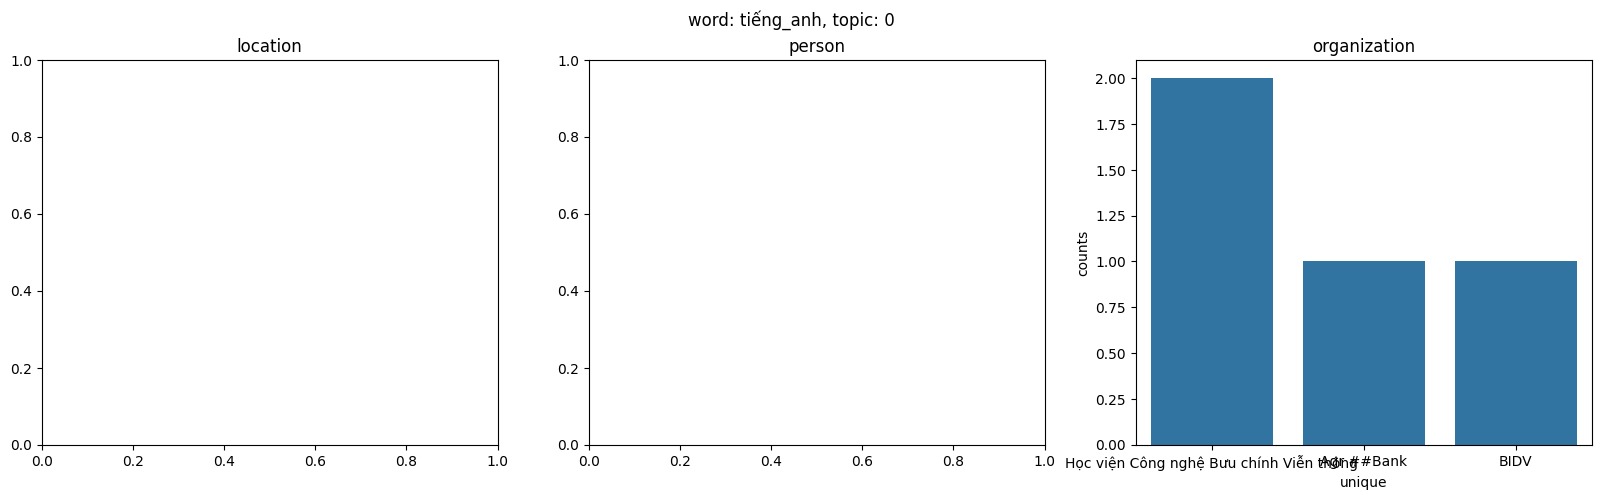

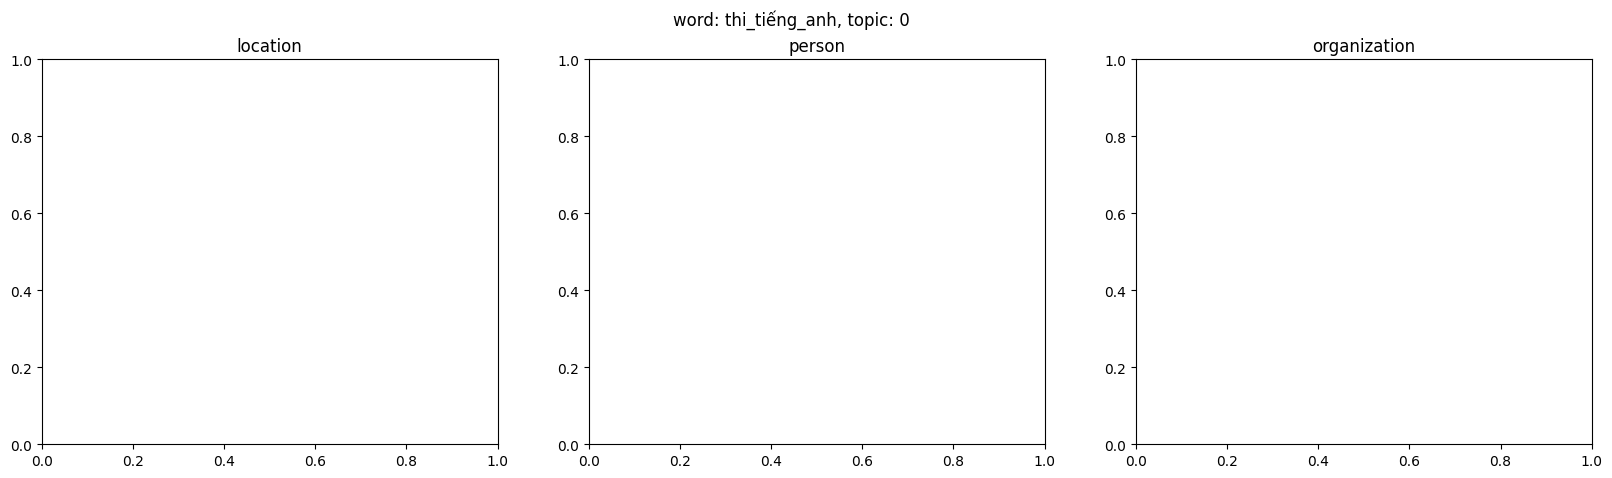

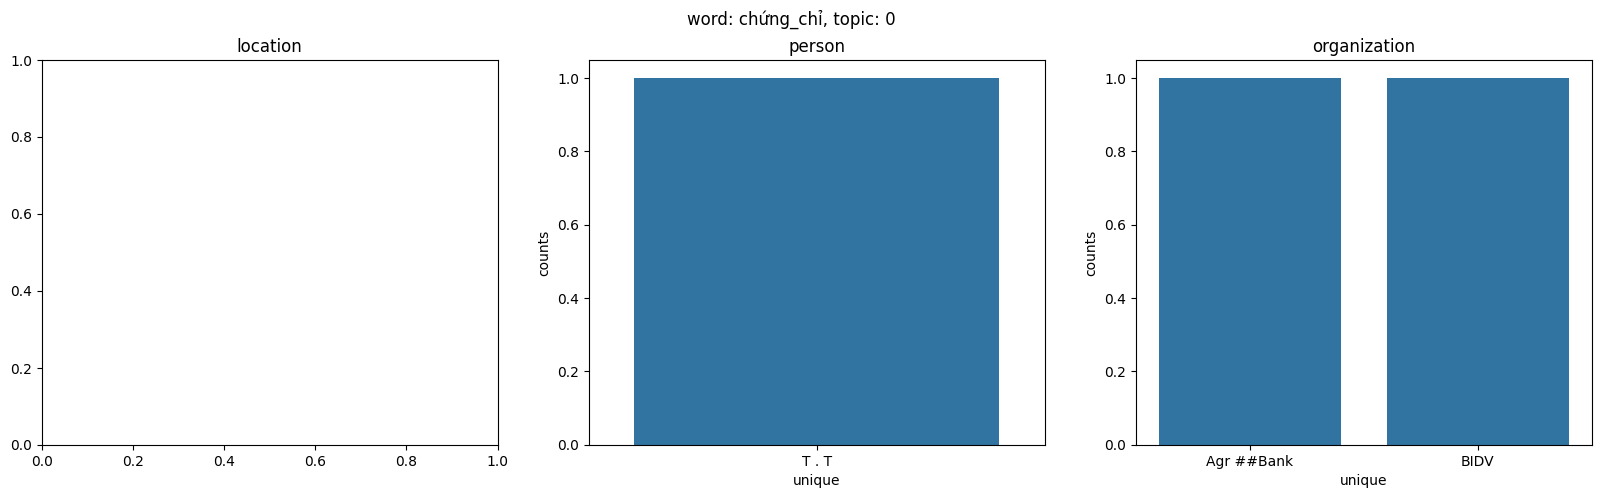

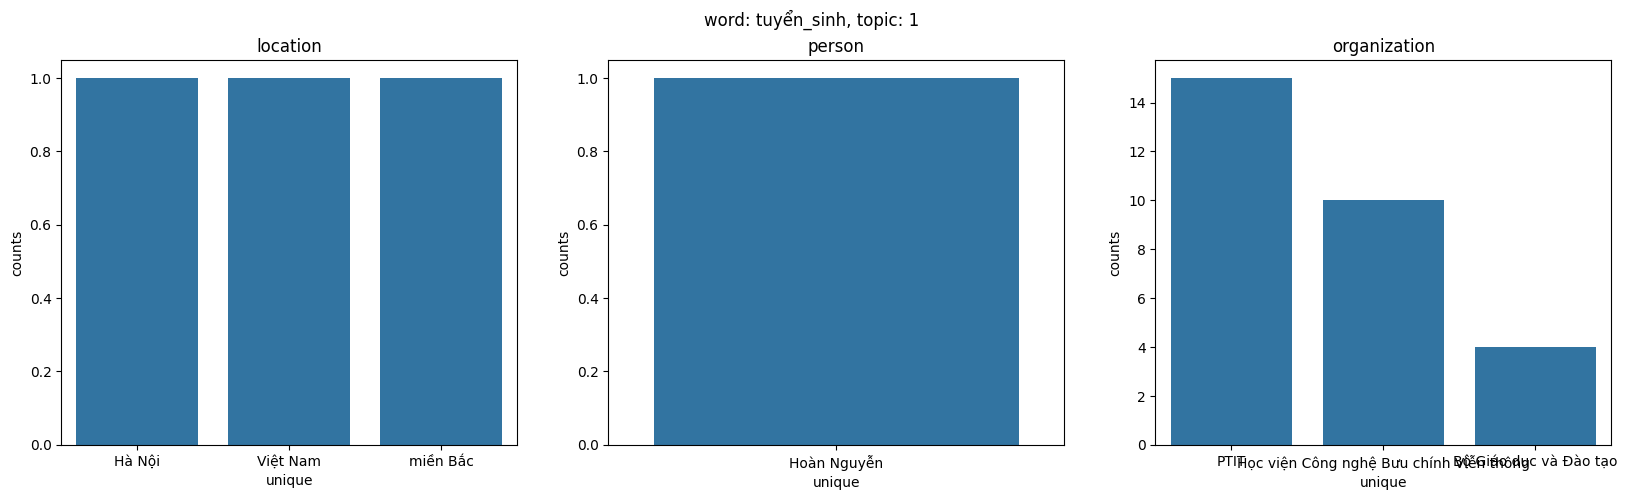

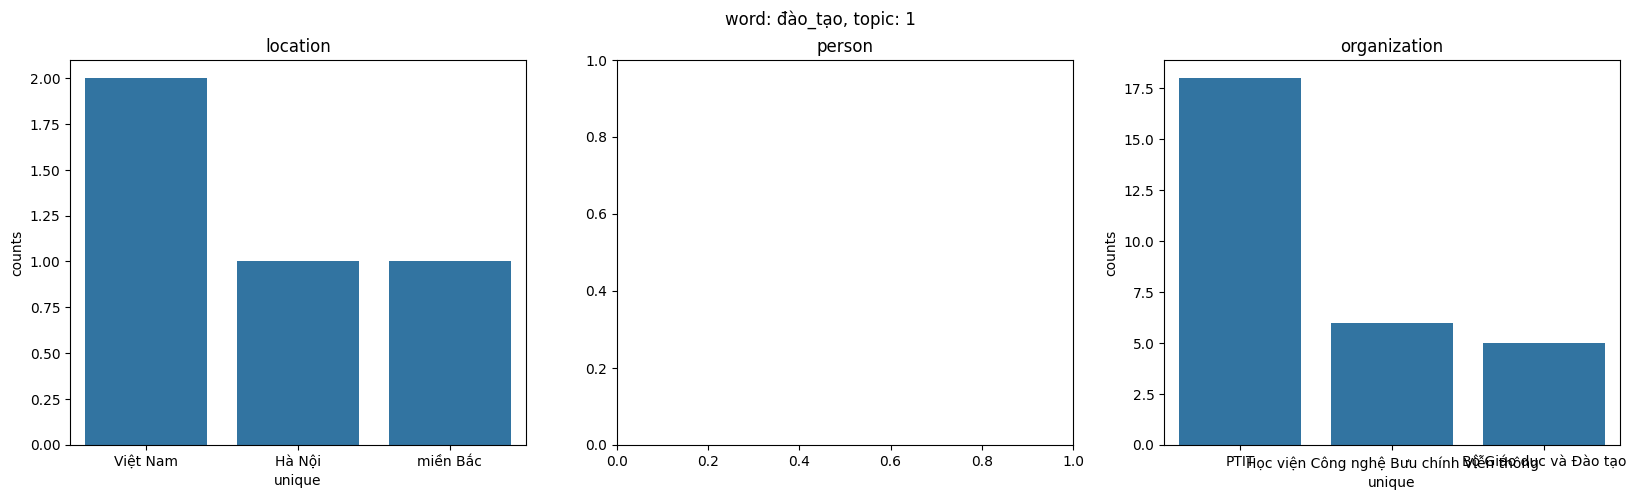

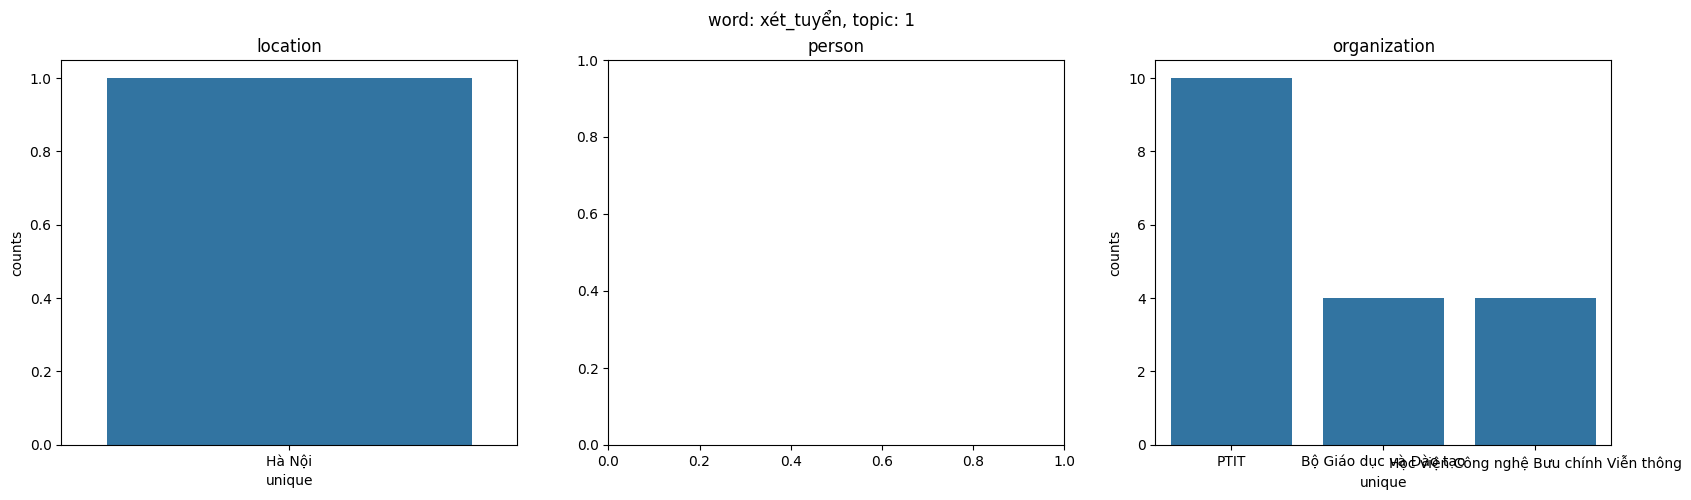

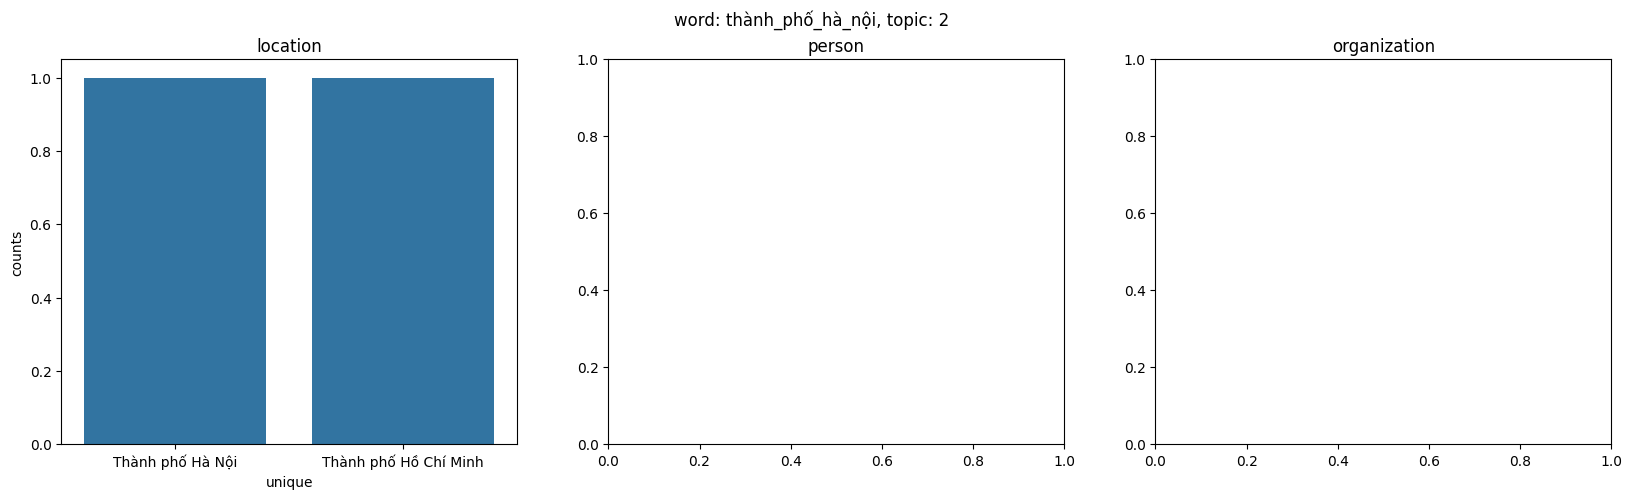

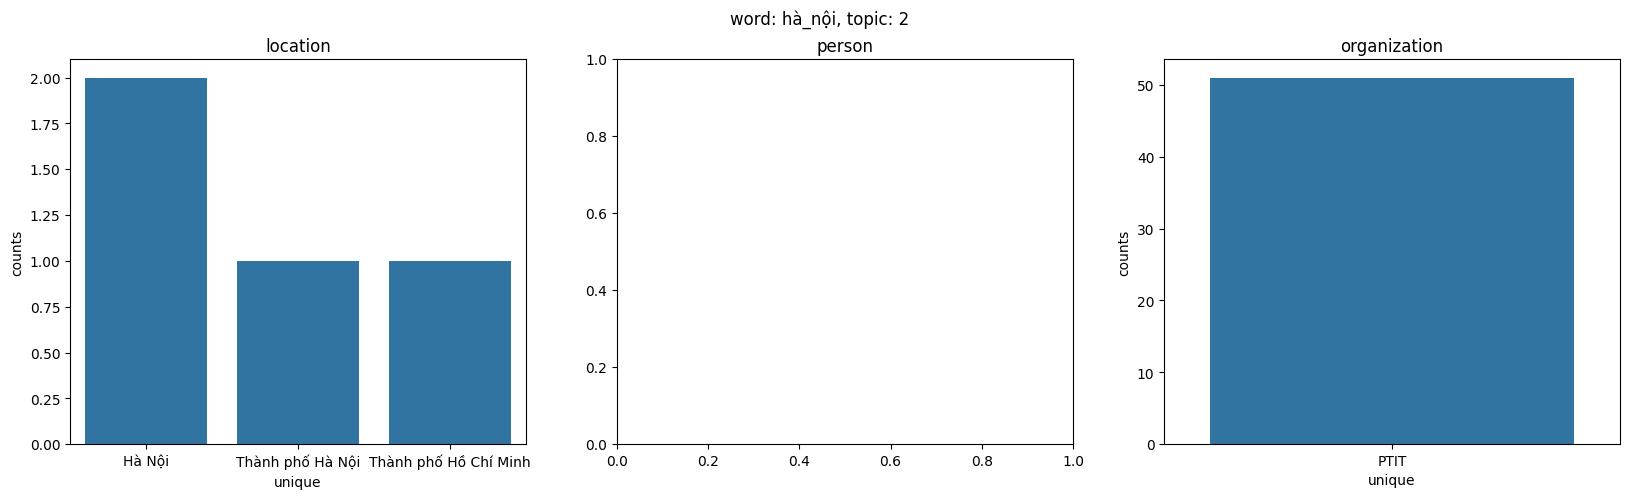

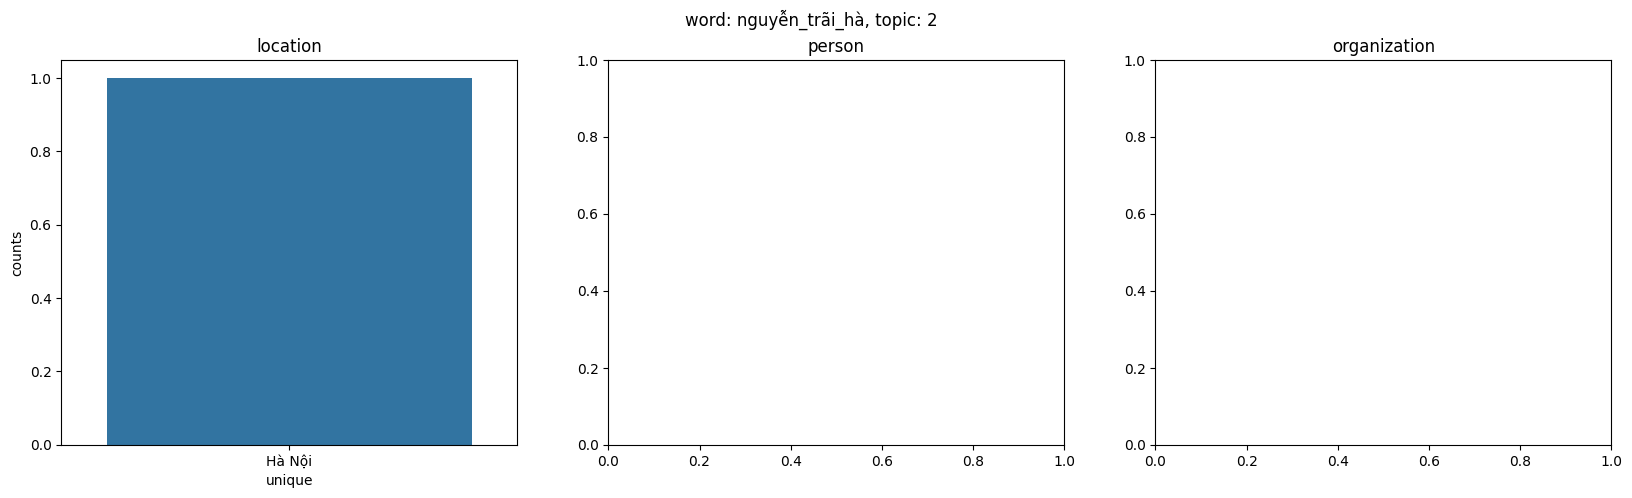

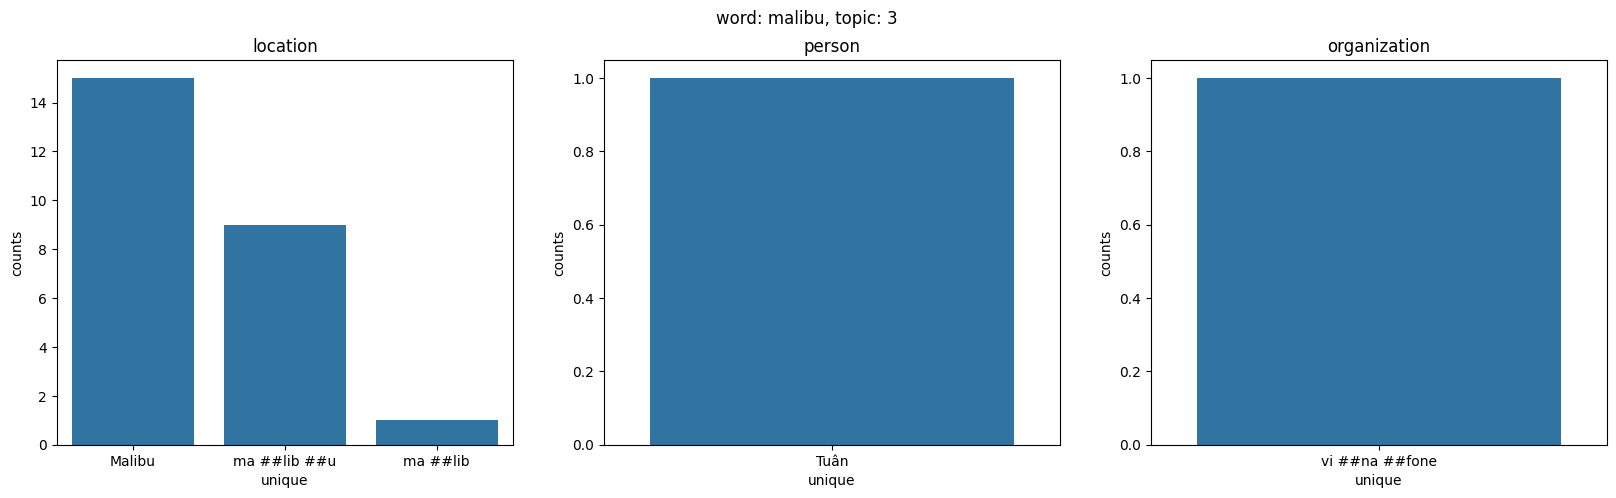

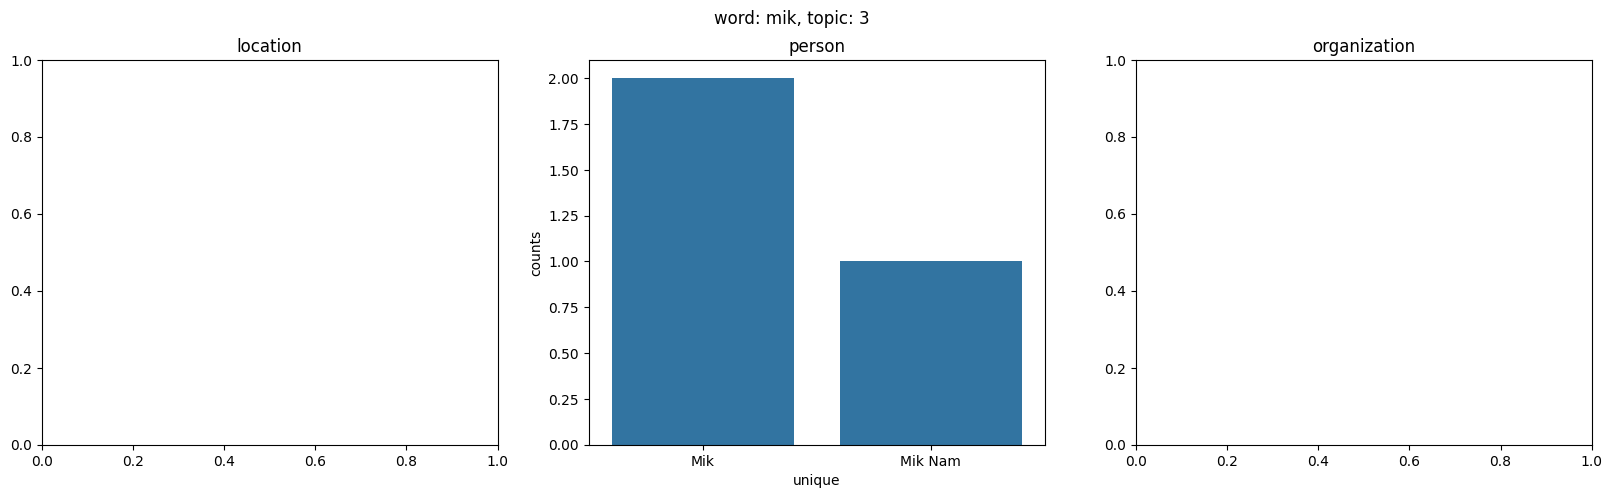

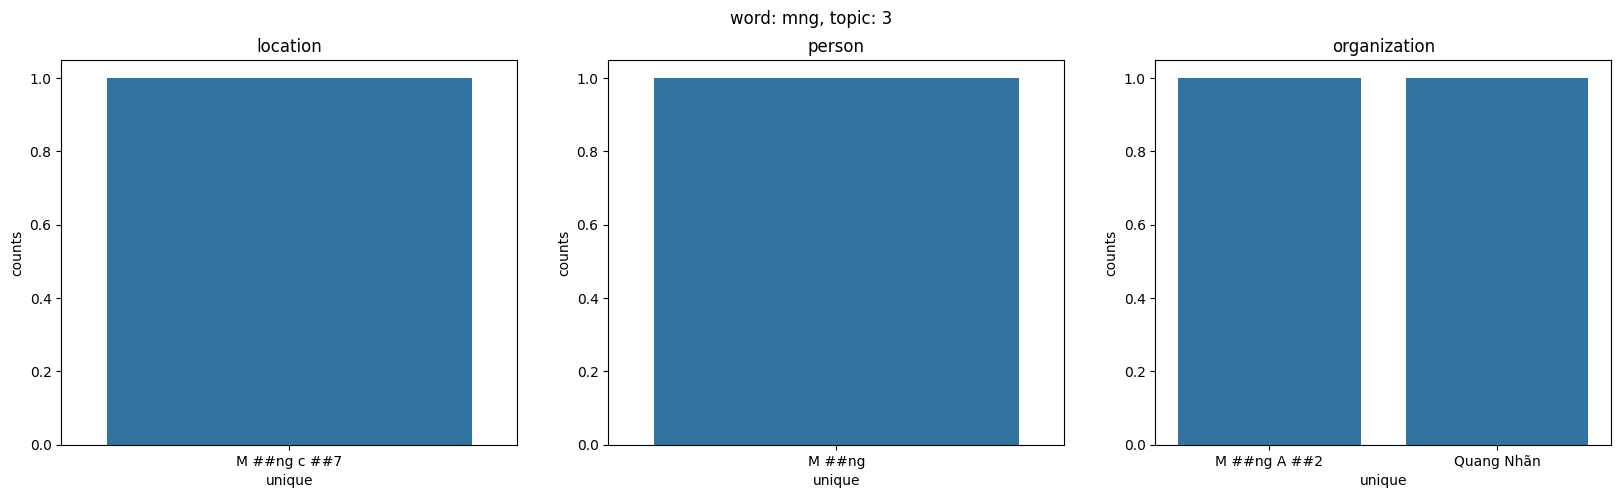

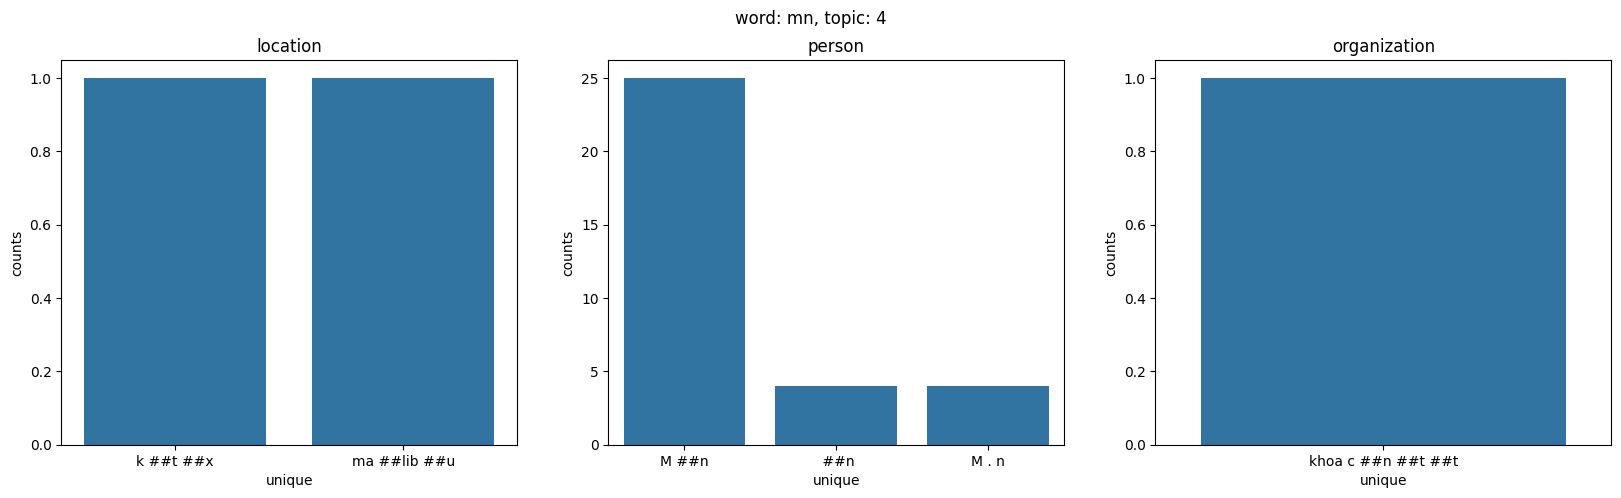

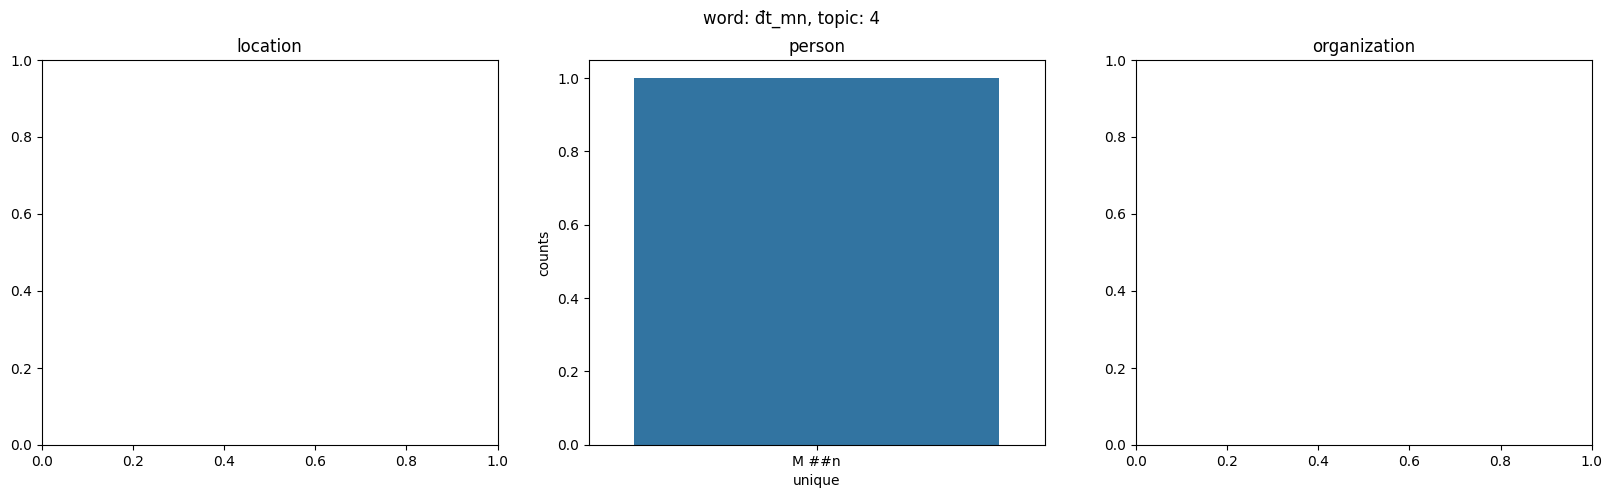

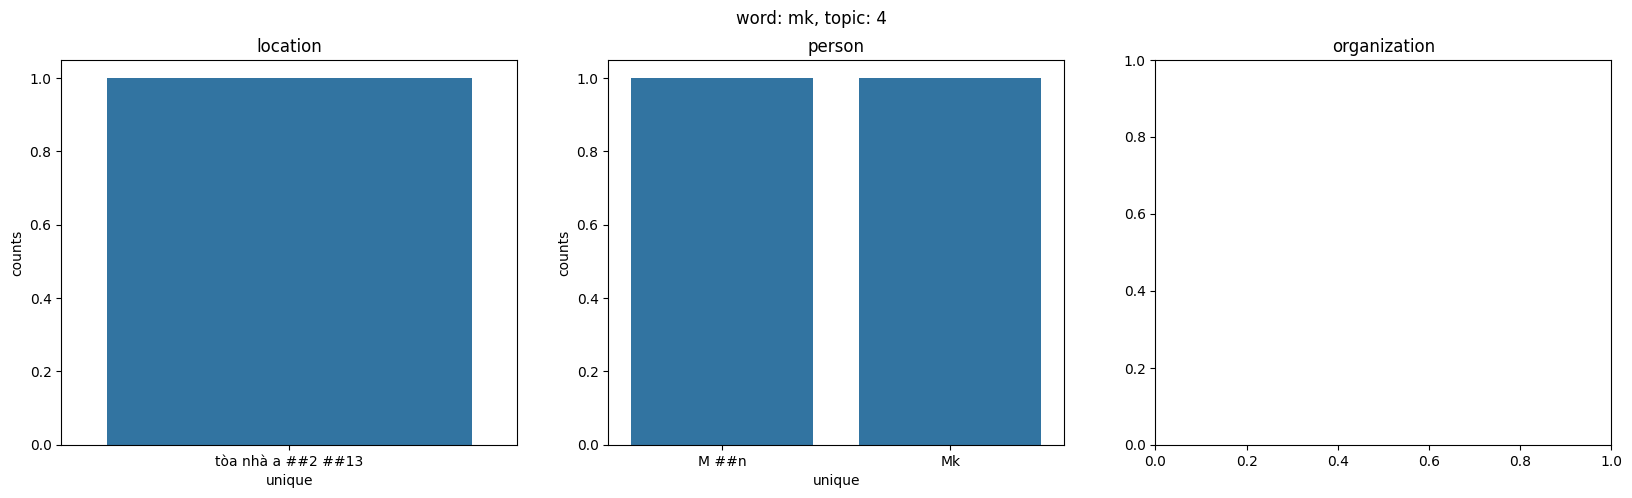

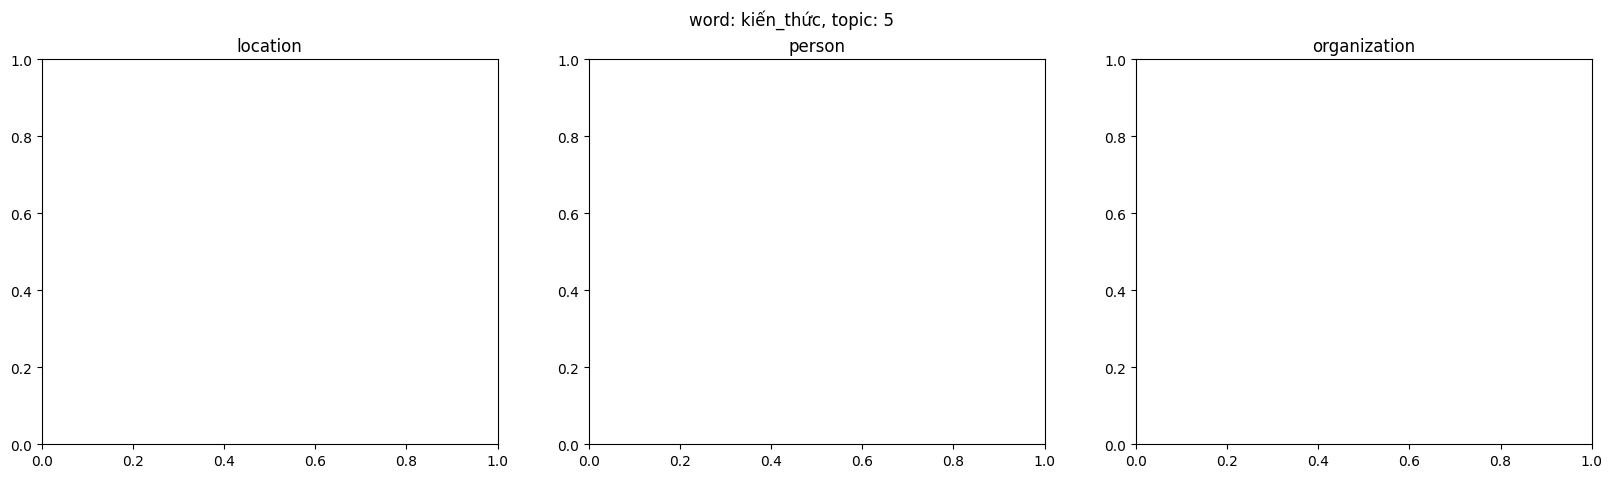

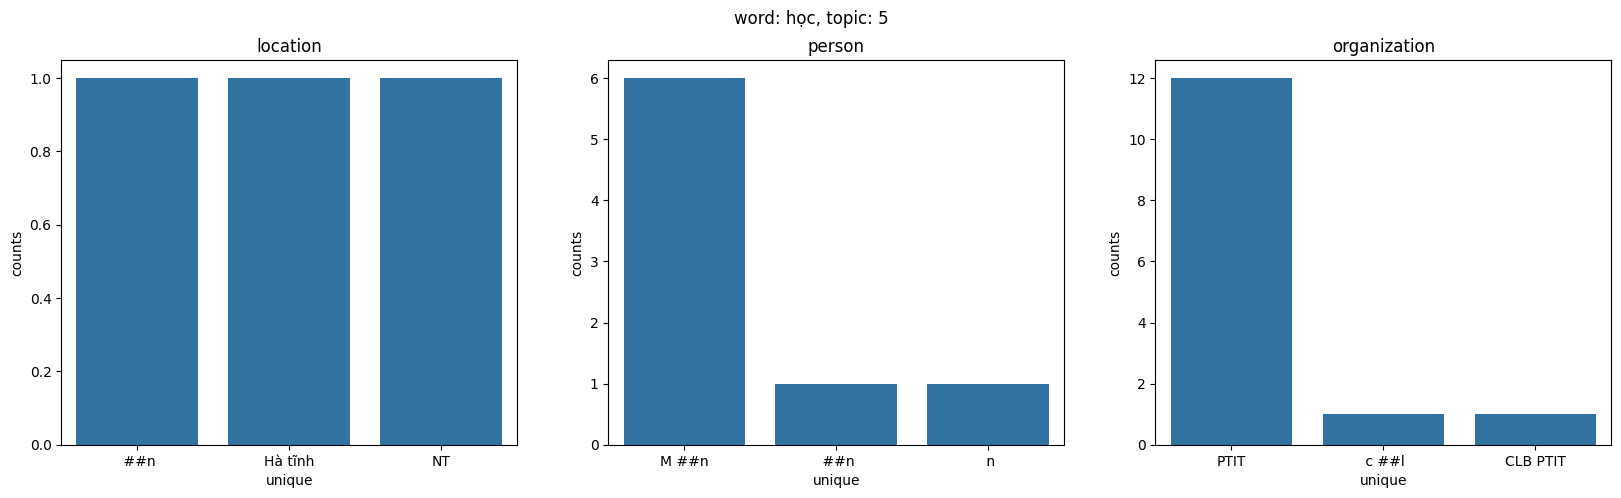

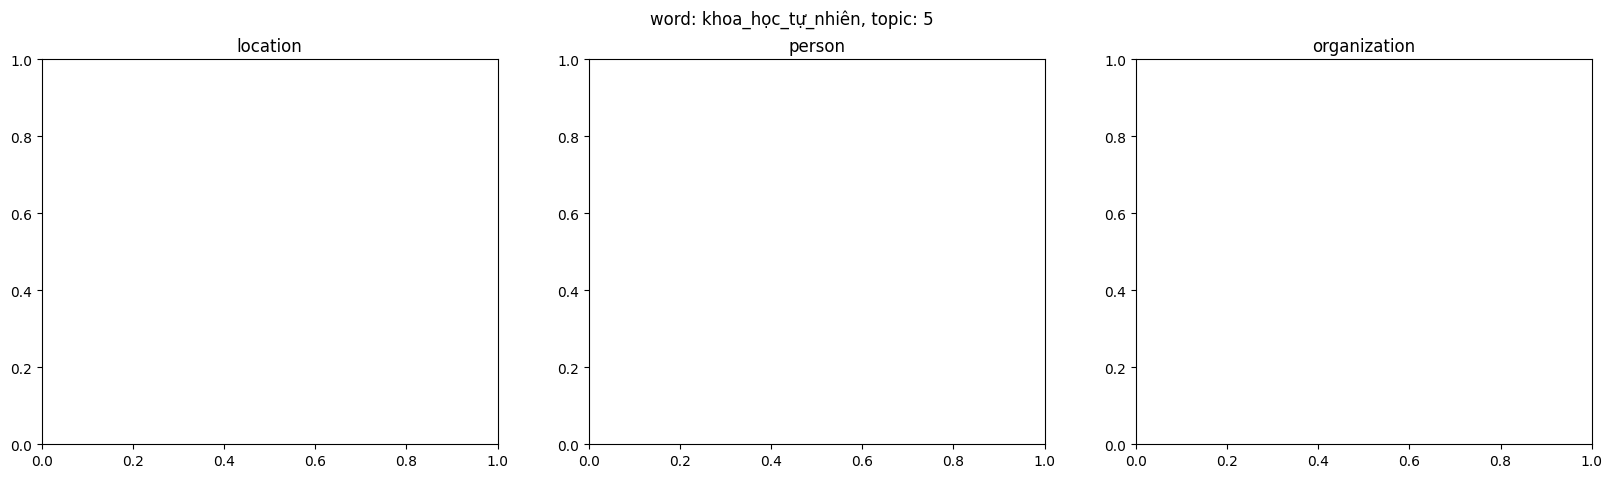

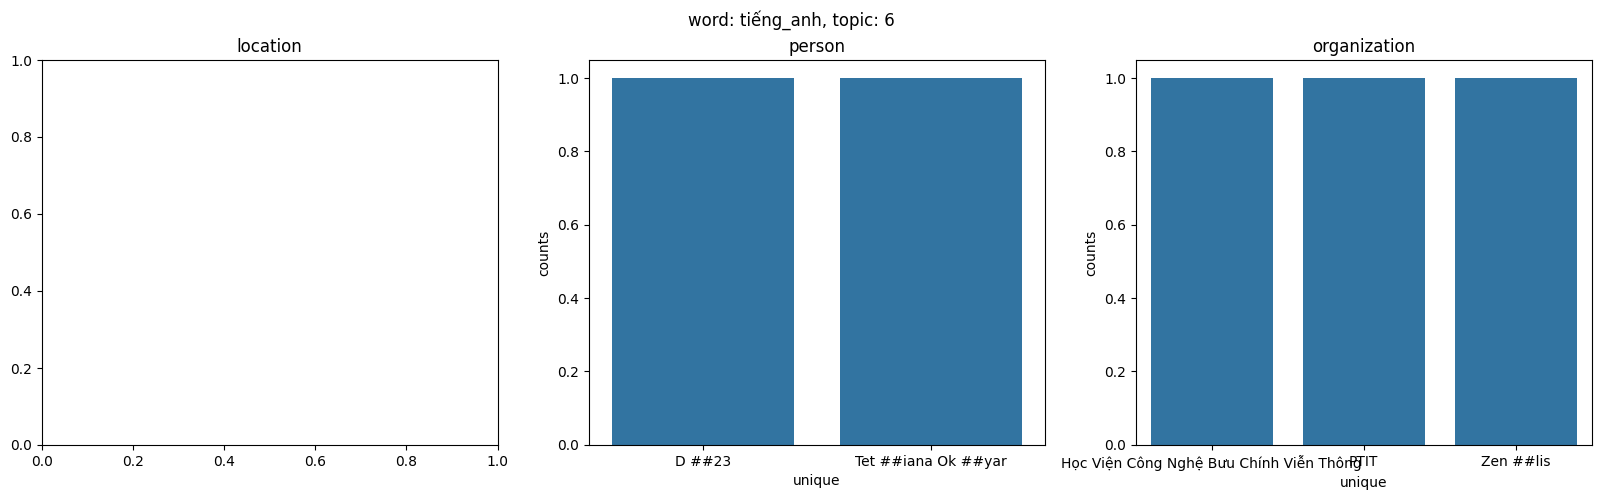

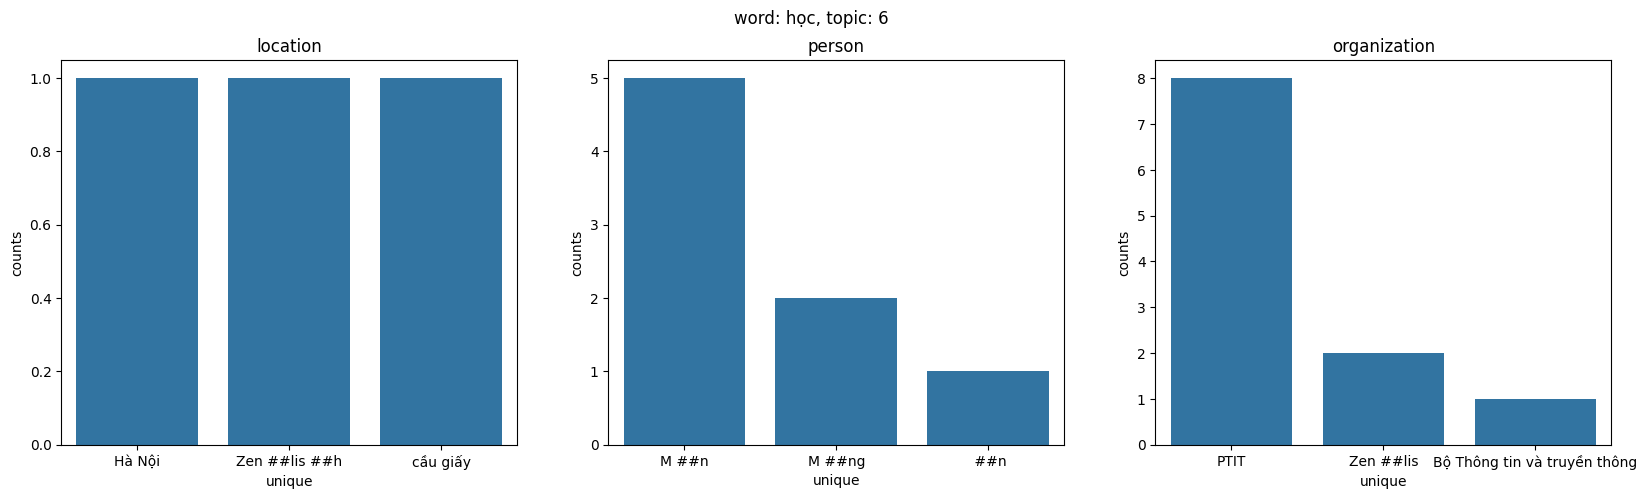

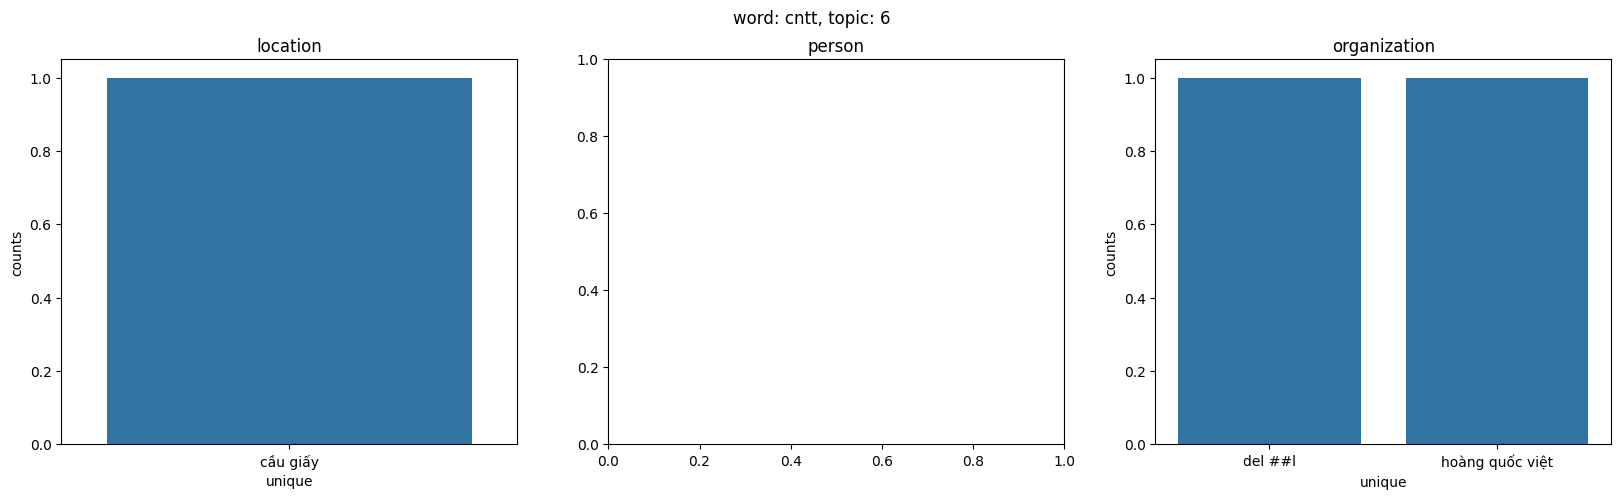

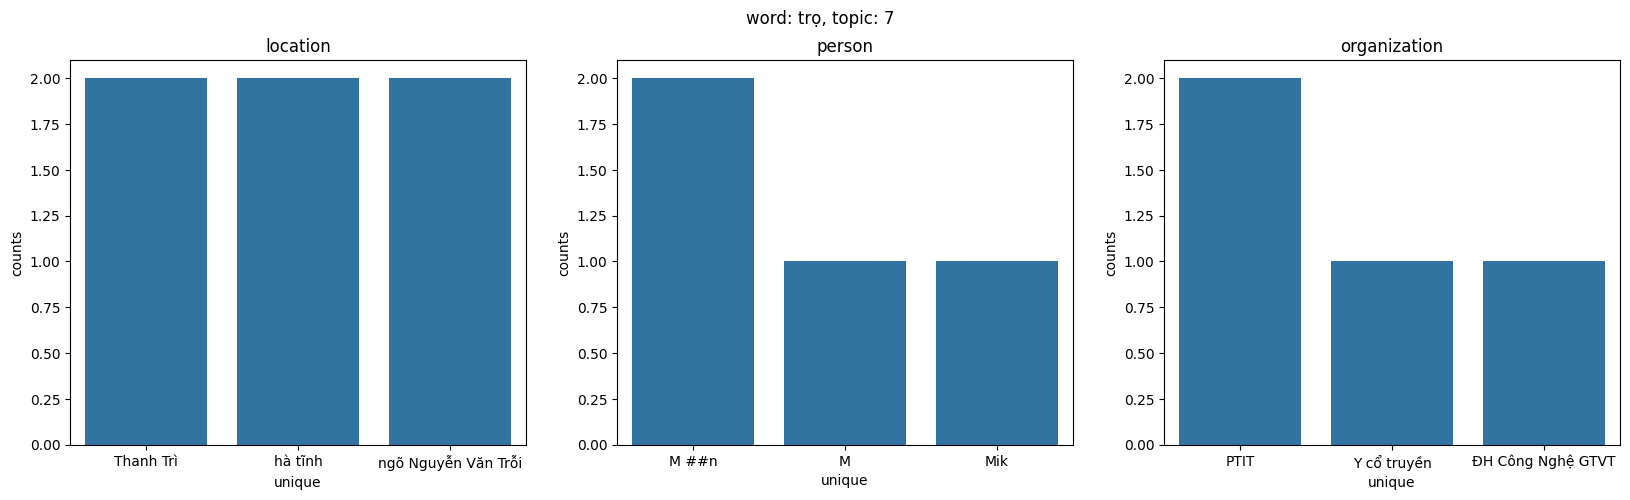

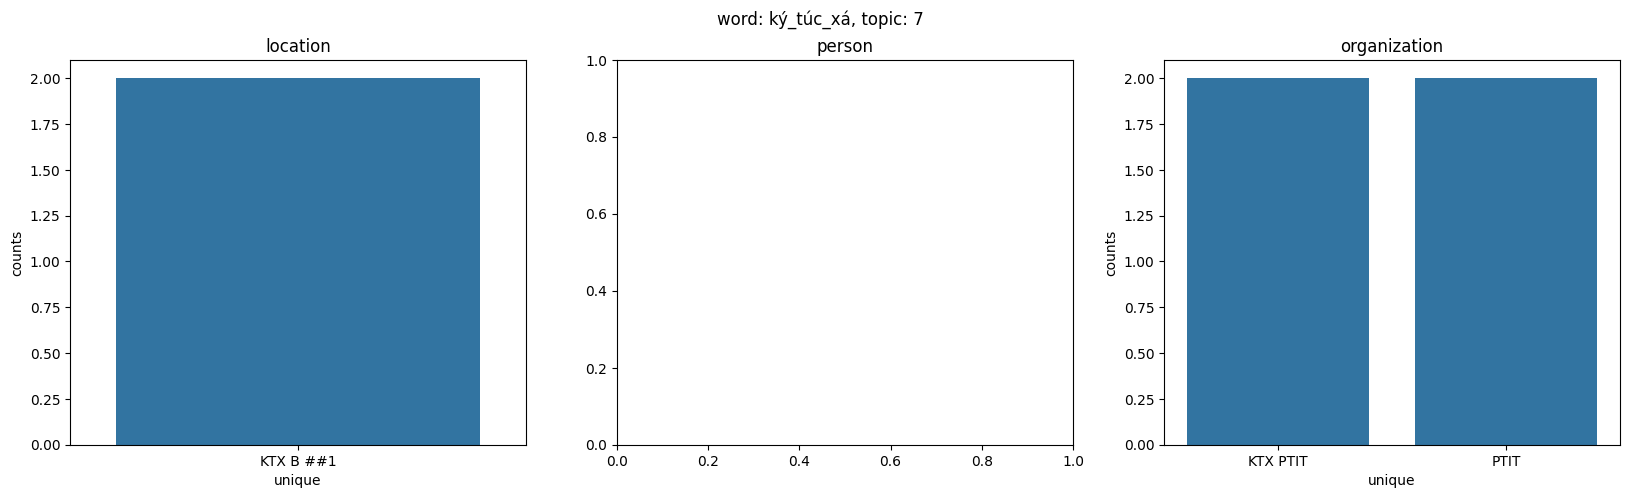

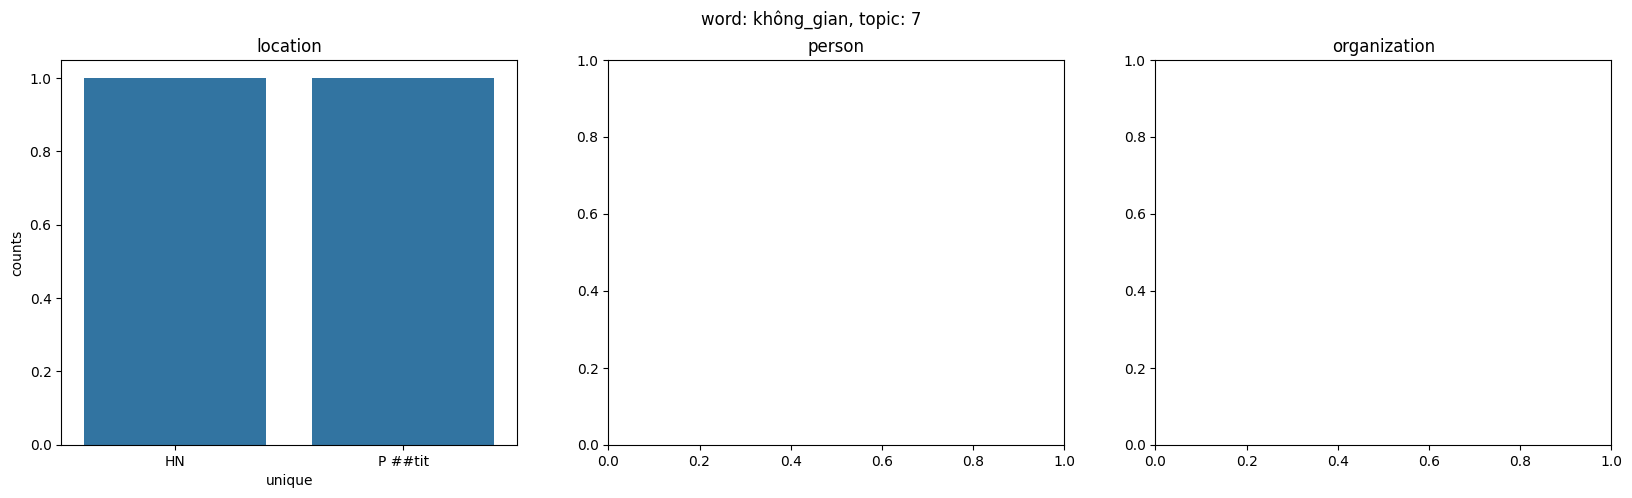

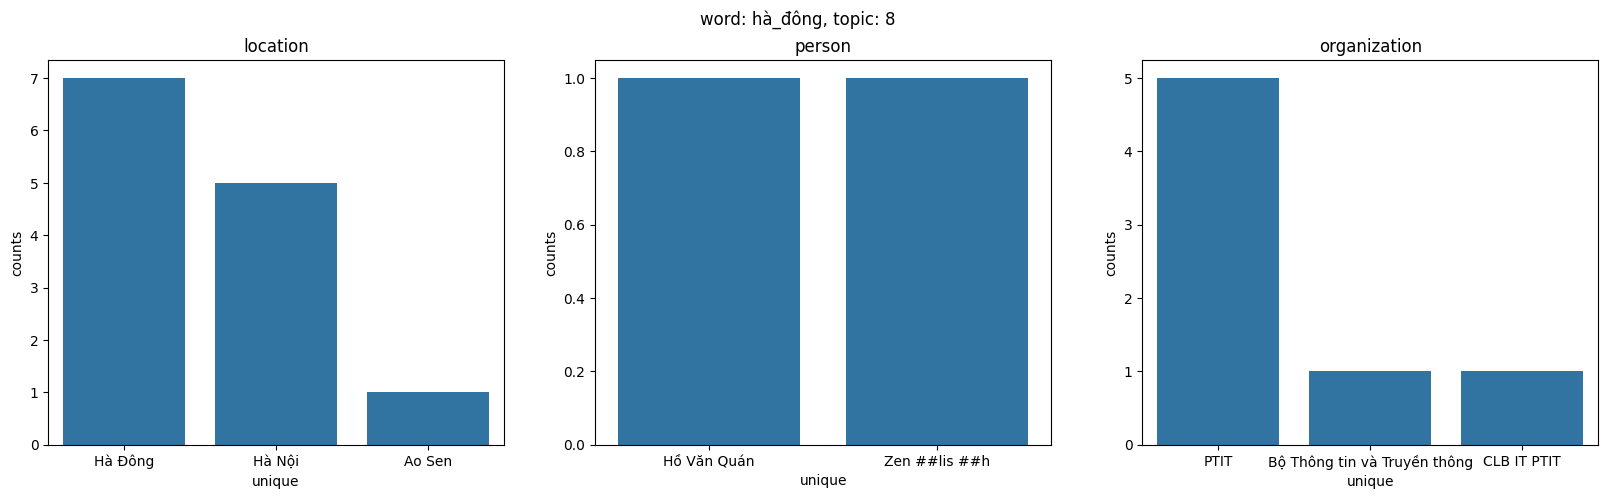

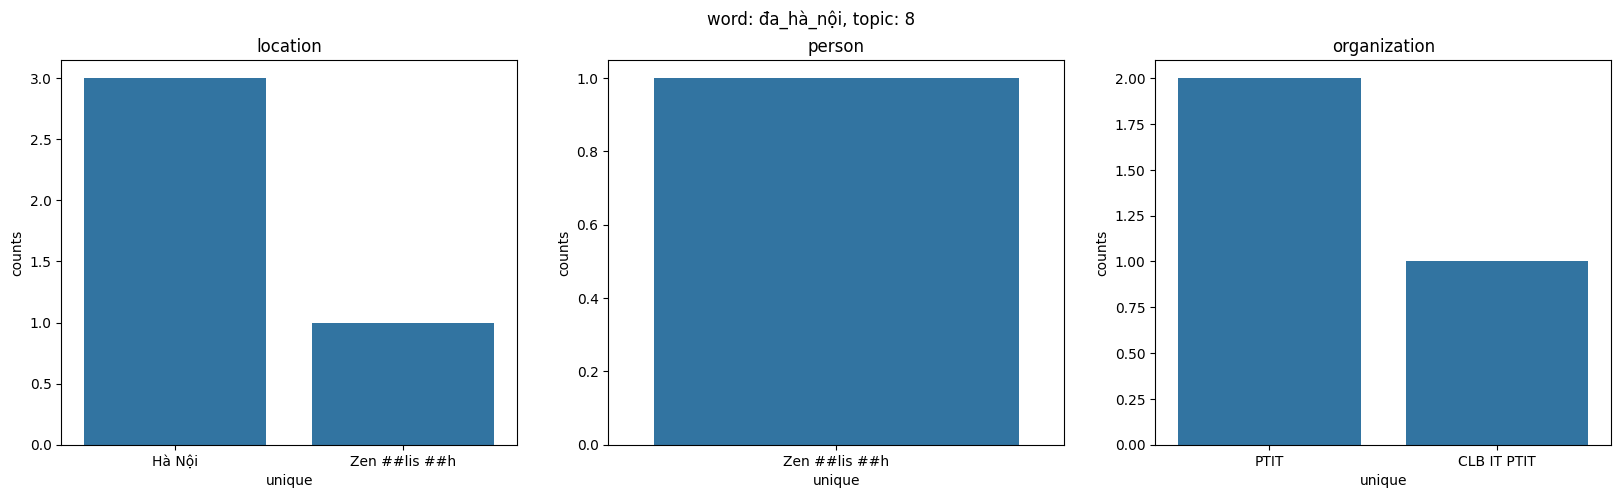

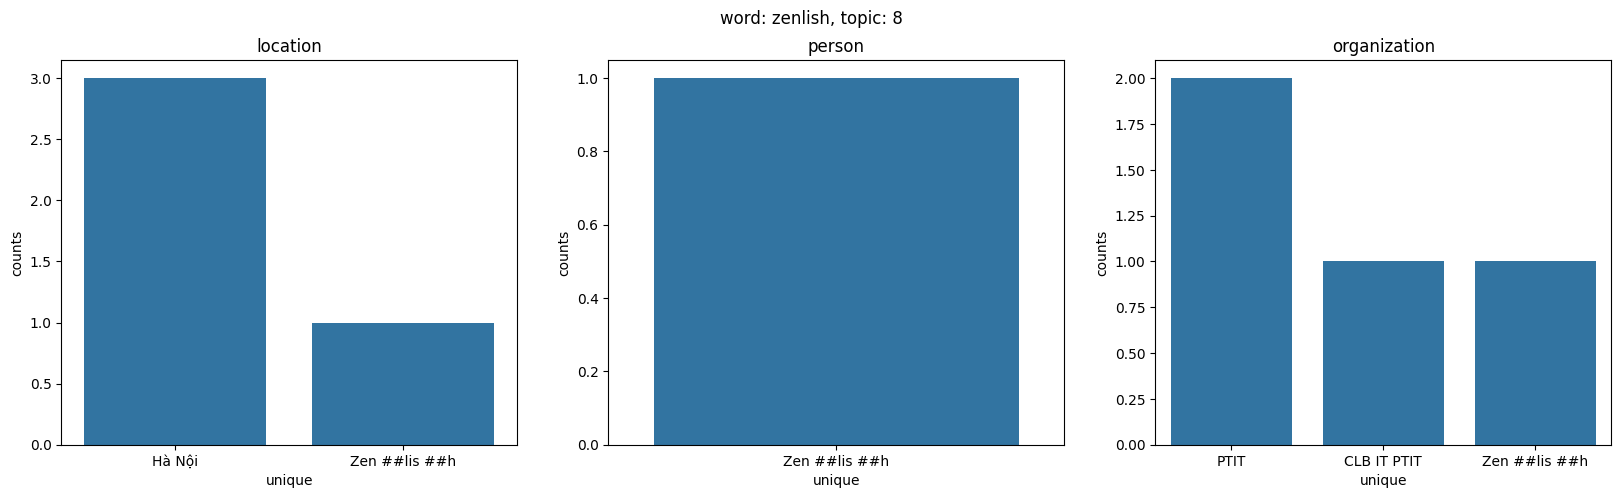

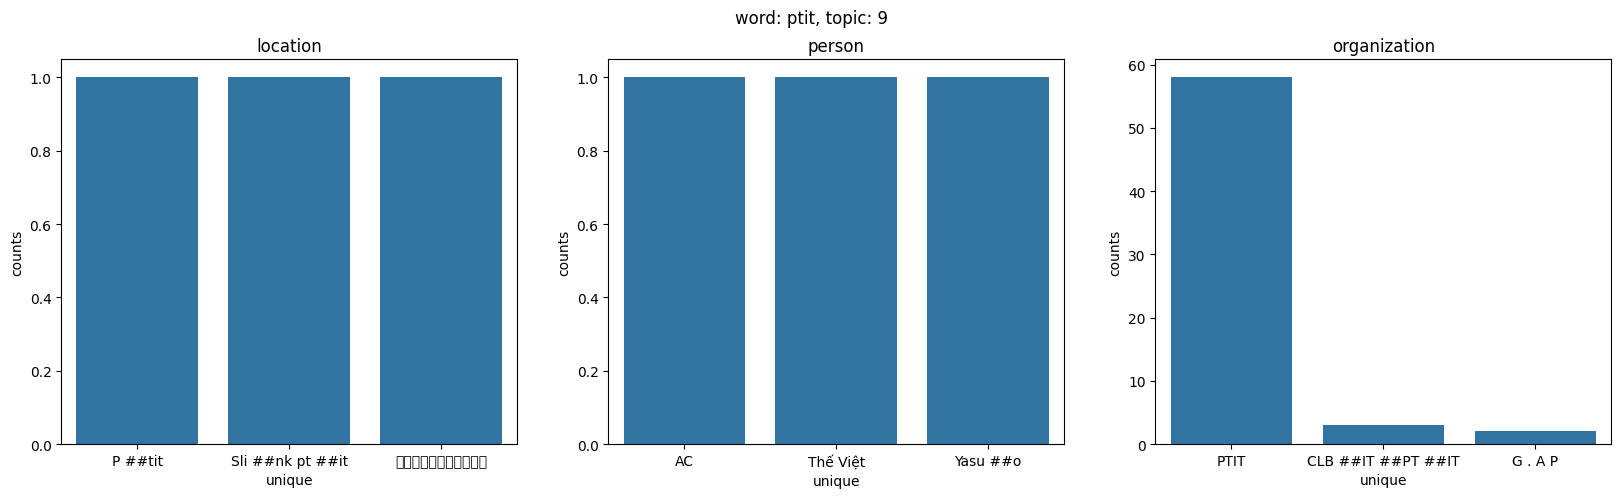

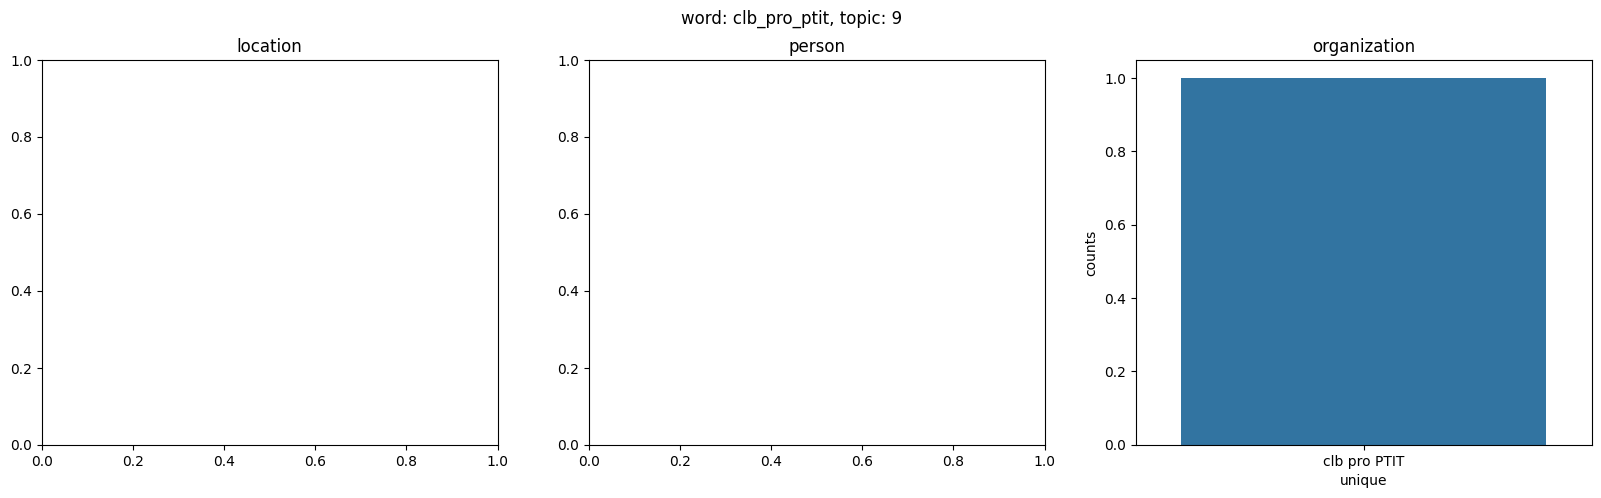

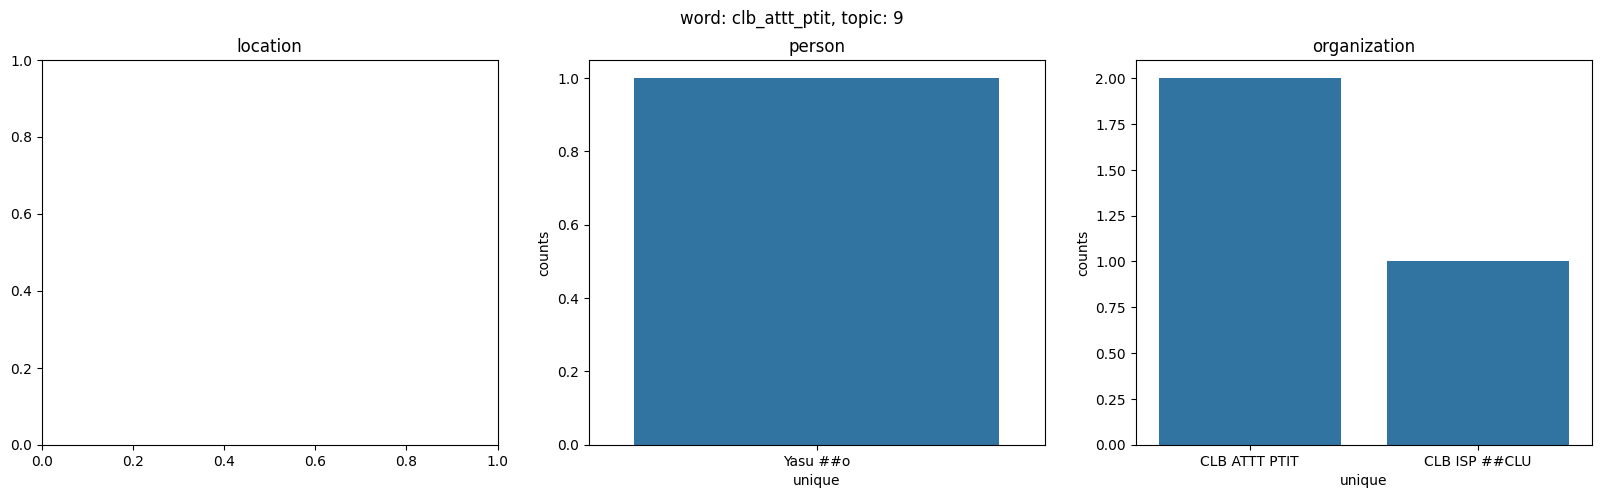

In [24]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
t = 0

def get_word_in_time(data, time_start, time_end, topic):
    return data[(data['timestamp'] >= time_start) & (data['timestamp'] <= time_end) & (data['Topic'] == topic)]['Words']

def _get_word(documents,timestamps, nr_bins):
    global_c_tf_idf = normalize(topic_model.c_tf_idf_, axis=1, norm='l1', copy=False)
    all_topics = sorted(list(documents.Topic.unique()))
    all_topics_indices = {topic: index for index, topic in enumerate(all_topics)}
    print(all_topics_indices)
    
    if isinstance(timestamps[0], str):
        infer_datetime_format = True if not datetime_format else False
        documents['timestamp'] = pd.to_datetime(documents['timestamp'], 
                                                infer_datetime_format=infer_datetime_format, 
                                                format=datetime_format)
    
    if nr_bins:
        documents['Bins'] = pd.cut(documents.timestamp, bins=nr_bins)
        documents['timestamp'] = documents.apply(lambda row:row.Bins.left, 1)
        

def getdoc(topic):
    doc = d[d['Topic']==topic]
    return doc

def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]

def list_arr_to_arr(arr):
    return [item for sublist in arr for item in sublist]

def unique_count(arr):
    # drop duplicate
    arr = [np.unique(x) for x in arr]
    # list arr to arr
    arr = list_arr_to_arr(arr)
    # count element
    unique, counts = np.unique(arr, return_counts=True)
    df = pd.DataFrame({'unique':unique,'counts':counts})
    df.sort_values(by=['counts'],ascending=False,inplace=True)
    return df

def plot_bar(data,title,word,topic):
    t = len(data)
    fig, ax = plt.subplots(1,t,figsize=(20,5))
    fig.suptitle(f'word: {word}, topic: {topic}')
    for i in range(t):
        sns.barplot(x='unique',y='counts',data=data[i],ax=ax[i])
        ax[i].set_title(title[i])

def find_word_in_doc(word,topic):
    doc_ = getdoc(topic)
    print('sum doc: ',len(doc_))
    doc_word = doc_[doc_['Document'].str.contains(word)]
    print(f'sum doc constains {word}: ',len(doc_word))
    
    arr_location = doc_word['location'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_location = unique_count(arr_location)
    df_location = df_location[0:3]
    # print('--------location--------')
    # print(df_location)
    
    arr_person = doc_word['person'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_person = unique_count(arr_person)
    df_person = df_person[0:3]
    # print('--------person--------')
    # print(df_person)
    
    arr_organization = doc_word['organization'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_organization = unique_count(arr_organization)
    df_organization = df_organization[0:3]
    # print('--------organization--------')
    # print(df_organization)
    # plot
    title = ['location','person','organization']
    data = [df_location,df_person,df_organization]
    plot_bar(data,title,word,topic)
    return doc_word


for i in range(topic_model.nr_topics):
    print('topic: ',i)
    x = topics[i][0:3]
    for word, score in x:
        print(word, score)
        print(len(find_word_in_doc(word,i)))
        print('------------------')

# _get_word(d,timestamp_,10)

In [25]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)
print('topic_distr: ',len(topic_distr[0])) # n: số lượng chủ đề
print('len of topic_distr: ',len(topic_distr)) # m: số lượng tài liệu hay bài báo
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

topic_distr:  10
len of topic_distr:  968


,kiếm,mập_mờ,malibu,gấp,lạnh,lắm,rồiiiiiii
3_malibu_mik_mng_đậu,0.168,0.328,0.533,0.533,0.365,0.205,0.000
7_trọ_ký_túc_xá_không_gian_phòng,0.000,0.000,0.103,0.103,0.103,0.103,0.000


In [26]:
print(topics_over_time.shape)
data_topic_over_time = topics_over_time
time_start = "2023-07-28"
time_end = "2023-08-16"
def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]
data_topic_over_time = get_doc_with_timestamp(data_topic_over_time,time_start,time_end)
data_topic_over_time.head(20)

(89, 5)


,Topic,Words,Frequency,Timestamp,Name
50,0,"tiếng_anh, tiếng_anh_liệu, chứng_chỉ, thi_tiến...",16,2023-07-29 04:48:00,0_tiếng_anh_thi_tiếng_anh_chứng_chỉ_tiến...
51,1,"apiquanlydaotaoptiteduvn, quét_mã, đào_tạo, xé...",20,2023-07-29 04:48:00,1_tuyển_sinh_đào_tạo_xét_tuyển_httpsdaot...
52,2,"thành_phố_hà_nội, nguyễn_trãi_hà, học_viện_côn...",8,2023-07-29 04:48:00,2_thành_phố_hà_nội_hà_nội_nguyễn_trãi_hà...
53,3,"httpsmmejabzuzi_unuyml, trường_minh, đăng_kí, ...",8,2023-07-29 04:48:00,3_malibu_mik_mng_đậu
54,4,"đt_mn, mn, mk, khmt, mng",1,2023-07-29 04:48:00,4_mn_đt_mn_mk_bn
55,5,"cntt, cntt_clc, clc, qtkd, khtn",3,2023-07-29 04:48:00,5_kiến_thức_học_khoa_học_tự_nhiên_toán
56,6,"đọc, học, kiến_thức, gym, đề_ets",10,2023-07-29 04:48:00,6_tiếng_anh_học_cntt_kiến_thức
57,7,"trọ, ký_túc_xá, tủ_lạnh, không_gian, tủ",16,2023-07-29 04:48:00,7_trọ_ký_túc_xá_không_gian_phòng
58,8,"khôg_tắc, hà_tĩnh, hà_đông, học_viện_bưu_điện,...",11,2023-07-29 04:48:00,8_hà_đông_đa_hà_nội_zenlish__zenlish
59,9,"đăng_kí_nguyện_vọng, xettuyenptiteduvn, ptiter...",8,2023-07-29 04:48:00,9_ptit_clb_pro_ptit_clb_attt_ptit_clbitp...
